<a href="https://colab.research.google.com/github/Insight-Sogang-Univ/CaptionTeam/blob/main/demo_monolstm_flickr8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

###Fetch Dataset & Codes from GitHub


In [ ]:
%%shell
sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,005 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 155222 files and directories c

In [ ]:
%%capture
!pip install wandb
!pip install kora

In [ ]:
def download_folder(folder_id):
    """ I copy this one from my old code, use drive API directly (not pydrive) """
    # authenticate
    from google.colab import auth
    auth.authenticate_user()
    # get folder_name
    from googleapiclient.discovery import build
    service = build('drive', 'v3')
    folder_name = service.files().get(fileId=folder_id).execute()['name']
    # install library 
    url = 'https://github.com/segnolin/google-drive-folder-downloader/raw/master/download.py'
    path = '/usr/local/lib/python3.6/dist-packages/download.py'
    urlretrieve(url, path)
    # recursive download
    import download
    download.download_folder(service, folder_id, './', folder_name)
    return folder_name

In [ ]:
import os

# https://drive.google.com/drive/folders/16e_bNz92M5g3Myp2kKbGZcXIkDTjasP-?usp=sharing

if not os.path.exists('saved_models'):
    from kora import drive
    drive.download_folder('16e_bNz92M5g3Myp2kKbGZcXIkDTjasP-')

In [ ]:
%%shell

if [ ! -f "train_torch.py" ]
then
    git clone https://github.com/Subangkar/Image-Captioning-Attention-PyTorch/
    mv Image-Captioning-Attention-PyTorch/* .
    rm -r Image-Captioning-Attention-PyTorch
fi


In [ ]:
# %%capture
%%shell
mkdir -p data/flickr8k/
if [ ! -f "data/flickr8k/Flickr8k_Dataset.zip" ]
then
    wget "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip" -O "data/flickr8k/Flickr8k_Dataset.zip"
    wget "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip" -O "data/flickr8k/Flickr8k_text.zip"
fi

if [ ! -d "data/flickr8k/Flicker8k_Dataset" ]
then
    unzip "data/flickr8k/Flickr8k_Dataset.zip" -d data/flickr8k/
fi

if [ ! -d "data/flickr8k/Flickr8k_text" ]
then
    unzip "data/flickr8k/Flickr8k_text.zip" -d data/flickr8k/Flickr8k_text
    rm -r "data/flickr8k/Flickr8k_text/__MACOSX"
fi

if [ -d "data/flickr8k/__MACOSX" ]
then
    rm -r "data/flickr8k/__MACOSX"
fi
mkdir -p saved_models


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/flickr8k/Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: data/flickr8k/Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3429581486_4556471d1a.jpg  
  inflating: data/flickr8k/Flicker8k_Dataset/3429641260_2f035c1813.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3429641260_2f035c1813.jpg  
  inflating: data/flickr8k/Flicker8k_Dataset/3429956016_3c7e3096c2.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3429956016_3c7e3096c2.jpg  
  inflating: data/flickr8k/Flicker8k_Dataset/3430100177_5864bf1e73.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3430100177_5864bf1e73.jpg  
  inflating: data/flickr8k/Flicker8k_Dataset/3430287726_94a1825bbf.jpg  
  inflating: data/flickr8k/__MACOSX/Flicker8k_Dataset/._3430287726_94a1825bbf.jpg  
  inflating: data/flic

In [ ]:
%%shell

if [ ! -f "data/glove.6B.zip" ]
then
    wget "http://nlp.stanford.edu/data/glove.6B.zip" -O "data/glove.6B.zip"
fi

if [ ! -d "data/glove.6B" ]
then
    unzip "data/glove.6B.zip" -d "data/glove.6B"
fi


--2021-12-29 17:54:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-29 17:54:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-29 17:54:39--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘data/glove.6B.zip’

da

###Setup Depencencies

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Demo

In [ ]:
MODEL_DIR = '/content/drive/MyDrive/saved_models/vgg16_monolstm/'
MODEL_NAME = 'vgg16_monolstm_b128_emdGLV300_h256_ep180_weights.pt'

In [ ]:
import os
import pickle
from torch.utils.data import DataLoader
from torchvision import transforms

from datasets.flickr8k import Flickr8kDataset
from metrics import *
from utils_torch import *
from utils_plot import visualize_att

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
DATASET_BASE_PATH = 'data/flickr8k/'

In [ ]:
vocab_set = pickle.load(open(MODEL_DIR+'vocab_set.pkl', 'rb')) if os.path.exists(MODEL_DIR+'vocab_set.pkl') else None
vocab, word2idx, idx2word, max_len = vocab_set
vocab_size = len(vocab)
vocab_size, max_len

(7707, 40)

In [ ]:
val_set = Flickr8kDataset(dataset_base_path=DATASET_BASE_PATH, dist='val', vocab_set=vocab_set, device=device,
                          return_type='corpus',
                          load_img_to_memory=False)
test_set = Flickr8kDataset(dataset_base_path=DATASET_BASE_PATH, dist='test', vocab_set=vocab_set, device=device,
                           return_type='corpus',
                           load_img_to_memory=False)
train_eval_set = Flickr8kDataset(dataset_base_path=DATASET_BASE_PATH, dist='train', vocab_set=vocab_set, device=device,
                                 return_type='corpus',
                                 load_img_to_memory=False)
len(train_eval_set), len(val_set), len(test_set)

(6000, 1000, 1000)

In [ ]:
EMBEDDING_DIM = 300
HIDDEN_SIZE = 256
BATCH_SIZE = 16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
checkpoint = torch.load(os.path.join(MODEL_DIR, MODEL_NAME))

In [ ]:
def evaluate_model(data_loader, model, loss_fn, vocab_size, bleu_score_fn, tensor_to_word_fn, desc=''):
    running_bleu = [0.0] * 5
    model.eval()
    t = tqdm(iter(data_loader), desc=f'{desc}')
    for batch_idx, batch in enumerate(t):
        images, captions, lengths = batch
        outputs = tensor_to_word_fn(model.sample(images).cpu().numpy())

        for i in (1, 2, 3, 4):
            running_bleu[i] += bleu_score_fn(reference_corpus=captions, candidate_corpus=outputs, n=i)
        t.set_postfix({
            'bleu1': running_bleu[1] / (batch_idx + 1),
            'bleu4': running_bleu[4] / (batch_idx + 1),
        }, refresh=True)
    for i in (1, 2, 3, 4):
        running_bleu[i] /= len(data_loader)
    return running_bleu



In [ ]:
from models.torch.vgg16_monolstm import Captioner

final_model = Captioner(EMBEDDING_DIM, HIDDEN_SIZE, vocab_size, num_layers=2).to(device)
final_model.load_state_dict(checkpoint['state_dict'])
final_model.eval()


Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Captioner(
  (encoder): Encoder(
    (vgg16): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): ReLU(inplace=True)
        (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (13): ReLU(inplace=True)
        (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=train_eval_set.pad_value).to(device)
sentence_bleu_score_fn = bleu_score_fn(4, 'sentence')
corpus_bleu_score_fn = bleu_score_fn(4, 'corpus')
tensor_to_word_fn = words_from_tensors_fn(idx2word=idx2word)

eval_transformations = transforms.Compose([
    transforms.Resize(256),  # smaller edge of image resized to 256
    transforms.CenterCrop(256),  # get 256x256 crop from random location
    transforms.ToTensor(),  # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),  # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))
])

val_set.transformations = eval_transformations
test_set.transformations = eval_transformations
train_eval_set.transformations = eval_transformations

In [ ]:
eval_collate_fn = lambda batch: (torch.stack([x[0] for x in batch]), [x[1] for x in batch], [x[2] for x in batch])
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, sampler=None, pin_memory=False,
                        collate_fn=eval_collate_fn)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, sampler=None, pin_memory=False,
                         collate_fn=eval_collate_fn)
train_eval_loader = DataLoader(train_eval_set, batch_size=BATCH_SIZE, shuffle=False, sampler=None, pin_memory=False,
                               collate_fn=eval_collate_fn)


In [ ]:
model = final_model
model.eval()

Captioner(
  (encoder): Encoder(
    (vgg16): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): ReLU(inplace=True)
        (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (13): ReLU(inplace=True)
        (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

['a bunch of people drinking at a bar in a club .', 'A man is smiling with one hand on his forehead at a crowded bar .', 'A man wearing a black jacket and white shirt is talking to a woman at a bar .', 'The people are gathered at a bar .', 'Various people are talking together at a bar .']
greedy: a man is helping someone wears headphones around his neck as he sits at a restaurant . 
beam_width=3: various people are talking together at a bar . 
beam_width=5: various people are talking together at a bar . 
beam_width=7: various people are talking together at a bar . 


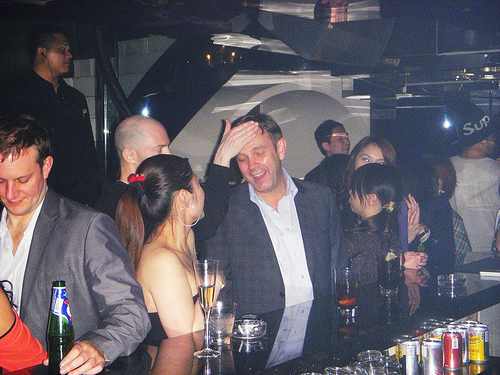

In [ ]:
t_i = 100
dset = train_eval_set
im, cp, _ = dset[t_i]
capidx = model.sample(im.unsqueeze(0))[0].detach().cpu().numpy()
print(dset.get_image_captions(t_i)[1])
caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                         map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
print(f'greedy:', caption_pred)
for k in (3,5,7):
  capidx = model.sample_beam_search(im.unsqueeze(0), beam_width=k)[0]
  caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                          map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
  print(f'beam_width={k}:', caption_pred)
Image.open(dset.get_image_captions(t_i)[0])


['a kayaker plungles into the river .', 'A person in a canoe is rafting in wild waters .', 'A person is half submerged in water in their yellow kayak .', 'A woman has positioned her kayak nose down in the water .', 'The man in a yellow kayak is paddling through rough waters .']
greedy: a man battles the ocean with his hands up while their mother are standing behind him . 
beam_width=3: a man battles the rapids . 
beam_width=5: a man battles the rapids . 
beam_width=7: a man battles the rapids . 


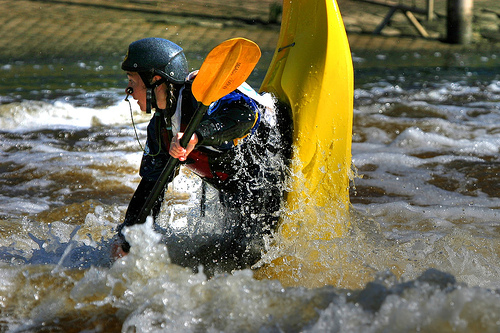

In [ ]:
t_i = 500
dset = val_set
im, cp, _ = dset[t_i]
capidx = model.sample(im.unsqueeze(0))[0].detach().cpu().numpy()
print(dset.get_image_captions(t_i)[1])
caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                         map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
print(f'greedy:', caption_pred)
for k in (3,5,7):
  capidx = model.sample_beam_search(im.unsqueeze(0), beam_width=k)[0]
  caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                          map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
  print(f'beam_width={k}:', caption_pred)
Image.open(dset.get_image_captions(t_i)[0])


['a man climbs a rock .', 'A man in green climbs a rock in a darkened forest .', 'A man scales a rock in the forest .', 'man climbing a rock', 'The man in the blue shirt climbs a large rock in a wooded area .']
greedy: a person hangs of a rock just to the ground . 
beam_width=3: a person scaling a large mountainside . 
beam_width=5: a person hangs off a cliff face . 
beam_width=7: a person climbing a large rock . 


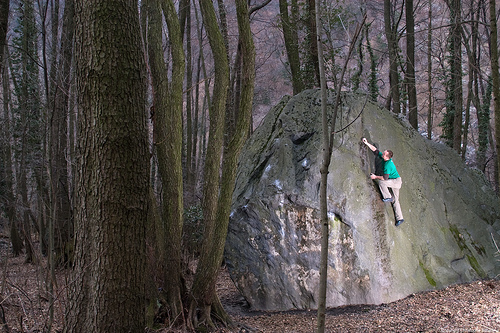

In [ ]:
t_i = 500
dset = test_set
im, cp, _ = dset[t_i]
capidx = model.sample(im.unsqueeze(0))[0].detach().cpu().numpy()
print(dset.get_image_captions(t_i)[1])
caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                         map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
print(f'greedy:', caption_pred)
for k in (3,5,7):
  capidx = model.sample_beam_search(im.unsqueeze(0), beam_width=k)[0]
  caption_pred=''.join(list(itertools.takewhile(lambda word: word.strip() != '<end>',
                                                          map(lambda idx: idx2word[idx]+' ', iter(capidx))))[1:])
  print(f'beam_width={k}:', caption_pred)
Image.open(dset.get_image_captions(t_i)[0])


In [ ]:
with torch.no_grad():
    model.eval()
    train_bleu = evaluate_model(desc=f'Train: ', model=final_model,
                                loss_fn=loss_fn, bleu_score_fn=corpus_bleu_score_fn,
                                tensor_to_word_fn=tensor_to_word_fn,
                                data_loader=train_eval_loader, vocab_size=vocab_size)
    val_bleu = evaluate_model(desc=f'Val: ', model=final_model,
                              loss_fn=loss_fn, bleu_score_fn=corpus_bleu_score_fn,
                              tensor_to_word_fn=tensor_to_word_fn,
                              data_loader=val_loader, vocab_size=vocab_size)
    test_bleu = evaluate_model(desc=f'Test: ', model=final_model,
                               loss_fn=loss_fn, bleu_score_fn=corpus_bleu_score_fn,
                               tensor_to_word_fn=tensor_to_word_fn,
                               data_loader=test_loader, vocab_size=vocab_size)
    for setname, result in zip(('train', 'val', 'test'), (train_bleu, val_bleu, test_bleu)):
        print(setname, end=' ')
        for ngram in (1, 2, 3, 4):
            print(f'Bleu-{ngram}: {result[ngram]}', end=' ')
        print()

Train:   0%|          | 0/375 [00:00<?, ?it/s]

Val:   0%|          | 0/63 [00:00<?, ?it/s]

Test:   0%|          | 0/63 [00:00<?, ?it/s]

train Bleu-1: 0.8171109613947383 Bleu-2: 0.7335037125849805 Bleu-3: 0.676988162552261 Bleu-4: 0.6360645044720491 
val Bleu-1: 0.5248200259733947 Bleu-2: 0.3126157891111751 Bleu-3: 0.18736103734921478 Bleu-4: 0.12109610551638944 
test Bleu-1: 0.5232142564221517 Bleu-2: 0.3096323334417751 Bleu-3: 0.18678147832703132 Bleu-4: 0.11458912960538656 
